# t-SNE Algorithm
## Author : Ashish Kumar Patra
t-SNE or T-distributed Stochastic Neighbour Embedding takes a High Dimensional Dataset and Reduces it to a Low Dimensional graph that retains a lot of the Original Information.
## 1. Import the Required Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

# for PCA
from sklearn.manifold import TSNE 

## 2. Load the Dataset and Check Details

In [4]:
train = pd.read_csv('C:\\Users\\ASHISH\\Desktop\\DataSets\\train_data.csv')
test = pd.read_csv('C:\\Users\\ASHISH\\Desktop\\DataSets\\test_data.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### i. Check the no of value for Each Label

In [5]:
train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

### ii. Extract the Label and Feature Columns

In [8]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

### iii. Check the Size of Label and Feature Columns

In [9]:
print(x.shape)
print(len(y))

(60000, 784)
60000


### iv. Plotting the Original Train Data

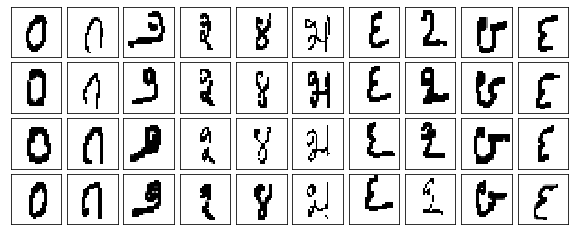

In [12]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize = (10, 4),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw = dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28), cmap='binary', interpolation='nearest', clim=(0, 16))
        
plot_digits(x)

### v. Standardization of Data

In [13]:
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(60000, 784)


### vi. Subsetting the Label and Feature Column from 0 to 10000

In [14]:
x_subset = x[0:10000]
y_subset = y[0:10000]

### vii. Unique Values of Label Column after Subsetting

In [15]:
print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


## 3. t-SNE Algorithm

In [16]:
tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

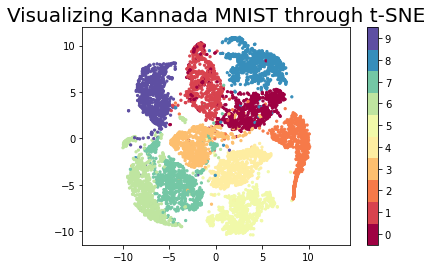

In [17]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=20);